# Patent analysis for EV

- set 1 is fuel cell
- set 2 is electric vehicle
- set 4 is internal combustion
- set 8 is hybrid

In [102]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
import pandas as pd
import nltk

In [101]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [48]:
patent=pd.read_csv('hassan_all_en_new.csv')

In [49]:
patent.head()

,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,publn,...,citing_publn_date,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr
0,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,WO9303532A1,...,2002-07-11,WO0199222A3,WO0119827W,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM,An electrical energy system including an elect...
1,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,US5121044A,...,1993-05-04\n1994-03-09\n1994-09-20\n1995-07-18...,US5208526A\nEP0557287A4\nUS5349535A\nUS5434020...,US63645090A\nEP91915464A\nUS96399792A\nUS15296...,52393850\n16916549\n54353461\n48212422\n457802...,27071024\n1239277\n25508001\n22545199\n2636904...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system,An electrical energy system including an elect...
2,DE19512512A,13386323,3505305,2,1,0,AT104194A,1994-05-20,1995-11-23,DE19512512A1,...,1999-04-14\n2003-02-27\n2007-05-22\n2011-05-05...,EP0834977A3\nDE10137908A1\nUS7221062B2\nWO2010...,EP97810450A\nDE10137908A\nUS48552204A\nWO20100...,17254227\n12994897\n51255594\n315713854\n33380...,4222203\n7694132\n7694132\n43298243\n44288075\...,4,"STEYR-DAIMLER-PUCH AG, WIEN, AT","STEYR-DAIMLER-PUCH AG, WIEN, AT",Regulating circuit for battery-operated electr...,The regulating circuit has a microprocessor re...
3,DE4417432A,11295467,3505504,2,1,0,AT105093A,1993-05-28,1994-12-01,DE4417432A1,...,1996-06-07\n1996-06-13\n1997-10-21\n1998-11-26...,FR2727654A1\nDE4442867A1\nUS5678646A\nDE197215...,FR9514218A\nDE4442867A\nUS56615095A\nDE1972152...,20508327\n11314571\n51875327\n13472609\n172965...,6534688\n6534688\n6534688\n7830237\n7831607\n7...,39,"STEYR-DAIMLER-PUCH AG, WIEN, AT","STEYR-DAIMLER-PUCH AG, WIEN, AT",Liquid-cooled drive unit for an electric vehicle,A drive unit for an electric vehicle comprises...
4,US25087194A,49013353,3505504,2,0,1,AT105093A,1993-05-28,1996-12-17,US5585681A,...,1998-08-27\n2001-03-06\n2002-10-02\n2003-03-05...,WO9828833A3\nUS6198183B1\nEP0951131A3\nEP12880...,WO9702146W\nUS29465599A\nEP99106967A\nEP020179...,43603749\n49378246\n17378403\n15912913\n487780...,20405163\n7865025\n7865025\n19091319\n19091319...,39,Steyr-Daimler Puch AG,Steyr-Daimler Puch AG,Liquid-cooled drive unit for an electric motor...,A drive unit for an electric motor car compris...


- appln                     The identifier of the application (with letter at the end, seems Google omits that)
- appln_id                  The (internal) patstat identifier of the application
- family_id                 The (internal) patstat identifier of the family that the application is a member of sets  - sets                      Indicate which sets (fuel-cell = 1, electric  vehicle = 2, both = 3) was matched
- direct                    Indicate whether this application was found directly (title/abstract/cpc/ipc) or      indirectly (family association)
- granted                   Whether or not the application was granted
- earliest_appln            Per family, the earliest application
- earliest_filing_date      The date of the family's earliest application
- publn                     Identifiers of publications associated with this application (*)
- publn_date                The dates of associated publications (*)
- publn_first_grant         Indicates for each publication if its the first one with granted status
- num_cpc_class             The number of CPC classes for this application
- cpc_class                 The CPC class symbols for this application
- num_ipc_class             The number of IPC classes for this application
- ipc_class                 The IPC class symbols for this application
- num_cited_publn           The number of forward citations (this applications refers to other publications)
- cited_publn_date          The dates of cited publications (**)
- cited_publn               The identifiers of cited publications (**)
- cited_appln               The identifiers of the applications  associated with cited publications (**)
- cited_appln_id            The (internal) patstat identifiers of the  applications associated with cited publications (**)
- cited_family_id           The (internal) patstat identifiers of the  family associated with cited publications (**)
- num_cited_family          The total number of distinct families  associated with cited publications (***)
- num_citing_publn          The number of backward citations (other  publications refer to this application)
- citing_publn_date         The dates of citing publications (**)
- citing_publn              The identifiers of citing publications (**)
- citing_appln              The identifiers of the applications  associated with citing publications (**)
- citing_appln_id           The (internal) patstat identifiers of the  applications associated with citing publications (**)
- citing_family_id          The (internal) patstat identifiers of the  family associated with citing publications (**)
- num_citing_family         The total number of distinct families  associated with citing publications (***)
- earliest_applt            The name of the (first) applicant of the  earliest publication of this application 
- current_applt             The name of the (first) applicant of the most recent publication of this application
- appln_title               The title of this application
>>
>> (*/**) These are one per line, in consistent order


>> (***) These seem to be the numbers that google uses to count citations. You can get this from the export if you aggregate all applications within a family and discard duplicates.


In [95]:
patent.shape

(34223, 35)

# 1) EDA

## 1.1)-Types of features in our dataset

In [87]:
patent.dtypes.value_counts()

object            23
int64             11
datetime64[ns]     1
dtype: int64

In [88]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(patent)
table_dtype

,Data Type
application_date,datetime64[ns]
appln_id,int64
family_id,int64
sets,int64
direct,int64
granted,int64
num_citing_publn,int64
num_cited_publn,int64
num_citing_family,int64
num_cited_family,int64


## 1.2)-Checking missing values

In [89]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [91]:
missing_values = find_missing_values(patent, columns=patent.columns)
missing_values

Number of missing or NaN values for each column:


{'appln': 0,
 'appln_id': 0,
 'family_id': 0,
 'sets': 0,
 'direct': 0,
 'granted': 0,
 'earliest_appln': 0,
 'earliest_filing_date': 0,
 'publn_date': 0,
 'publn': 0,
 'publn_first_grant': 0,
 'publn_claims': 0,
 'num_cpc_class': 0,
 'cpc_class': 2187,
 'num_ipc_class': 0,
 'ipc_class': 30,
 'num_cited_publn': 0,
 'cited_publn_date': 10553,
 'cited_publn': 10553,
 'cited_appln': 10553,
 'cited_appln_id': 10553,
 'cited_family_id': 10553,
 'num_cited_family': 0,
 'num_citing_publn': 0,
 'citing_publn_date': 11662,
 'citing_publn': 11662,
 'citing_appln': 11662,
 'citing_appln_id': 11662,
 'citing_family_id': 11662,
 'num_citing_family': 0,
 'earliest_applt': 182,
 'current_applt': 182,
 'appln_title': 0,
 'appln_abstr': 0,
 'application_date': 0}

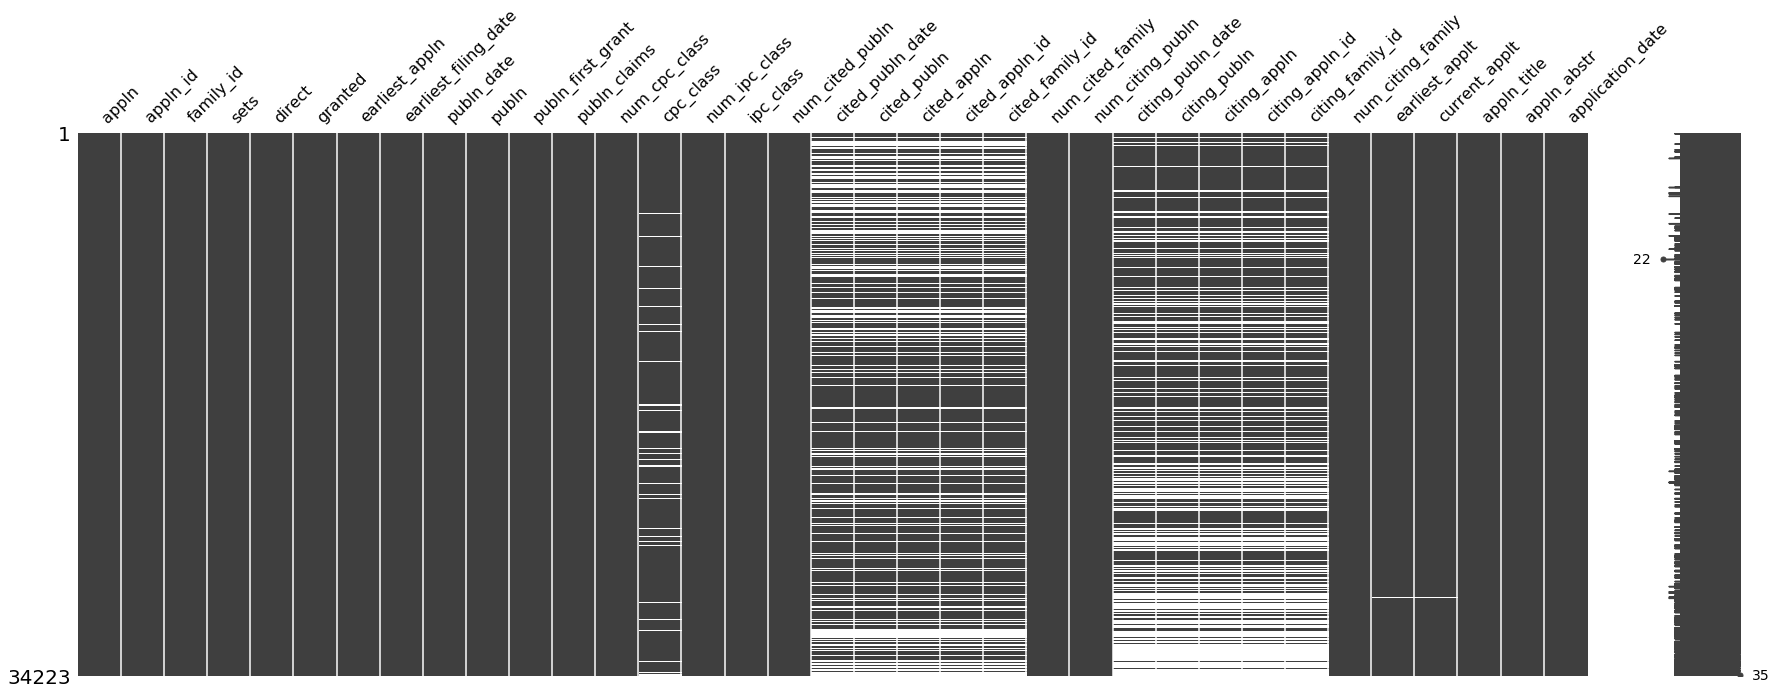

In [93]:
import missingno
missingno.matrix(patent, figsize = (30,10))

In [94]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(patent)

No. of fields:  34223
No. of missing fields:  14


,No. of mising Value,%age of missing Value
citing_appln,11662,34.1
citing_appln_id,11662,34.1
citing_publn_date,11662,34.1
citing_publn,11662,34.1
citing_family_id,11662,34.1
cited_appln_id,10553,30.8
cited_family_id,10553,30.8
cited_appln,10553,30.8
cited_publn_date,10553,30.8
cited_publn,10553,30.8


In [51]:
patent.sets.value_counts()

2     16947
8      8048
1      4411
4      1900
10     1867
12      672
3       160
14      112
9        49
5        21
6        20
11       16
Name: sets, dtype: int64

- set 1 is fuel cell and contains 4411 values
- set 2 is electric vehicle and contains 16947 values
- set 4 is internal combustion and contains 1900 values
- set 8 is hybrid and contains 8048 values

# 2) Comparing groups

In [56]:
patent['granted'][:5]

0    1
1    1
2    0
3    0
4    1
Name: granted, dtype: int64

In [57]:
patent['granted'].value_counts()

1    25900
0     8323
Name: granted, dtype: int64

In [58]:
patent['current_applt'].value_counts()

Toyota Jidosha Kabushiki Kaisha                                  1802
Hyundai Motor Company                                            1663
TOYOTA MOTOR CORP                                                1543
HONDA MOTOR CO LTD                                               1016
Ford Global Technologies, LLC                                     745
NISSAN MOTOR CO LTD                                               693
Honda Motor Co., Ltd.                                             517
Nissan Motor Co., Ltd.                                            480
Honda Giken Kogyo Kabushiki Kaisha                                340
TOYOTA JIDOSHA KABUSHIKI KAISHA                                   307
Toyota Motor Corporation                                          303
Robert Bosch GmbH                                                 259
HONDA MOTOR CO., LTD.                                             255
MITSUBISHI MOTORS CORP                                            229
TOYOTA MOTOR CO., LT

In [59]:
# suppose we want to see how many patents are granted to Hyundai Motor Company 

patent[patent.current_applt == 'Hyundai Motor Company'].granted.value_counts()

1    1339
0     324
Name: granted, dtype: int64

In [60]:
# if we wanna see %age
patent[patent.current_applt == 'Hyundai Motor Company'].granted.value_counts(normalize=True)

1    0.805171
0    0.194829
Name: granted, dtype: float64

In [61]:
# Use groupby
patent.groupby('granted').current_applt.value_counts(normalize=True)

granted  current_applt                                                
0        Toyota Jidosha Kabushiki Kaisha                                  0.108675
         Hyundai Motor Company                                            0.039254
         Nissan Motor Co., Ltd.                                           0.023746
         Ford Global Technologies, LLC                                    0.021323
         Honda Motor Co., Ltd.                                            0.019263
         Robert Bosch GmbH                                                0.015992
         HONDA MOTOR CO LTD                                               0.011510
         TOYOTA MOTOR CORP                                                0.011267
         TOYOTA JIDOSHA KABUSHIKI KAISHA                                  0.010783
         Mitsubishi Electric Corporation                                  0.010540
         Sony Corporation                                                 0.009692
         HYUNDAI

# 3)- Working with time series

Check which year has least and most patents granted <br>
earliest_filing_date= no. of patents' application

In [62]:
patent.earliest_filing_date.str.slice(0,4)

0        1990
1        1990
2        1994
3        1993
4        1993
5        1991
6        1995
7        1992
8        2002
9        2002
10       2002
11       1999
12       1999
13       1999
14       1999
15       1999
16       1999
17       1999
18       1999
19       1999
20       1999
21       1999
22       1999
23       1999
24       1999
25       1999
26       1999
27       1999
28       1996
29       1999
         ... 
34193    2017
34194    2017
34195    2016
34196    2017
34197    2017
34198    2017
34199    2017
34200    2017
34201    2017
34202    2016
34203    2016
34204    2017
34205    2017
34206    2017
34207    2017
34208    2017
34209    2017
34210    2017
34211    2016
34212    2014
34213    2014
34214    2014
34215    2016
34216    2016
34217    2016
34218    2016
34219    2016
34220    2016
34221    2015
34222    2017
Name: earliest_filing_date, Length: 34223, dtype: object

In [63]:
patent.earliest_filing_date.str.slice(0,4).value_counts()

2011    3816
2012    3231
2010    2849
2013    2615
2009    2285
2014    2165
2007    1844
2015    1744
2008    1667
2006    1619
2005    1050
2016    1040
2004     930
2001     892
2003     874
2002     849
2000     790
1999     695
1998     546
1997     507
1995     435
1996     382
1993     356
1994     344
1992     250
2017     198
1991     163
1990      86
2018       1
Name: earliest_filing_date, dtype: int64

In [64]:
# alternative way
filling_date= patent.earliest_filing_date
patent['application_date']= pd.to_datetime(filling_date)

In [65]:
patent.dtypes

appln                           object
appln_id                         int64
family_id                        int64
sets                             int64
direct                           int64
granted                          int64
earliest_appln                  object
earliest_filing_date            object
publn_date                      object
publn                           object
publn_first_grant               object
publn_claims                    object
num_cpc_class                    int64
cpc_class                       object
num_ipc_class                    int64
ipc_class                       object
num_cited_publn                  int64
cited_publn_date                object
cited_publn                     object
cited_appln                     object
cited_appln_id                  object
cited_family_id                 object
num_cited_family                 int64
num_citing_publn                 int64
citing_publn_date               object
citing_publn             

application_date ..................       datetime64[ns]

In [66]:
patent['application_date'].dt.year

0        1990
1        1990
2        1994
3        1993
4        1993
5        1991
6        1995
7        1992
8        2002
9        2002
10       2002
11       1999
12       1999
13       1999
14       1999
15       1999
16       1999
17       1999
18       1999
19       1999
20       1999
21       1999
22       1999
23       1999
24       1999
25       1999
26       1999
27       1999
28       1996
29       1999
         ... 
34193    2017
34194    2017
34195    2016
34196    2017
34197    2017
34198    2017
34199    2017
34200    2017
34201    2017
34202    2016
34203    2016
34204    2017
34205    2017
34206    2017
34207    2017
34208    2017
34209    2017
34210    2017
34211    2016
34212    2014
34213    2014
34214    2014
34215    2016
34216    2016
34217    2016
34218    2016
34219    2016
34220    2016
34221    2015
34222    2017
Name: application_date, Length: 34223, dtype: int64

In [67]:
# checking for highest patent in a year
patent['application_date'].dt.year.value_counts()

2011    3816
2012    3231
2010    2849
2013    2615
2009    2285
2014    2165
2007    1844
2015    1744
2008    1667
2006    1619
2005    1050
2016    1040
2004     930
2001     892
2003     874
2002     849
2000     790
1999     695
1998     546
1997     507
1995     435
1996     382
1993     356
1994     344
1992     250
2017     198
1991     163
1990      86
2018       1
Name: application_date, dtype: int64

In [68]:
# checking for least patents per year
patent['application_date'].dt.year.value_counts().sort_values()

2018       1
1990      86
1991     163
2017     198
1992     250
1994     344
1993     356
1996     382
1995     435
1997     507
1998     546
1999     695
2000     790
2002     849
2003     874
2001     892
2004     930
2016    1040
2005    1050
2006    1619
2008    1667
2015    1744
2007    1844
2014    2165
2009    2285
2013    2615
2010    2849
2012    3231
2011    3816
Name: application_date, dtype: int64

In [69]:
patent['application_date'].dt.year.value_counts(ascending= True)

2018       1
1990      86
1991     163
2017     198
1992     250
1994     344
1993     356
1996     382
1995     435
1997     507
1998     546
1999     695
2000     790
2002     849
2003     874
2001     892
2004     930
2016    1040
2005    1050
2006    1619
2008    1667
2015    1744
2007    1844
2014    2165
2009    2285
2013    2615
2010    2849
2012    3231
2011    3816
Name: application_date, dtype: int64

In [70]:
#We can even pick least patent year
patent.application_date.dt.year.value_counts().sort_values().index[0]

2018

In [71]:
# For highest year
patent.application_date.dt.year.value_counts().index[0]

2011

## 3.1)- Distribution of the patent applications over application years

use earliest_filing_date and granted variables
figure 3 in paper

In [72]:
patent.head()

,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,publn,...,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,application_date
0,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,WO9303532A1,...,WO0199222A3,WO0119827W,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM,An electrical energy system including an elect...,1990-07-19
1,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,US5121044A,...,US5208526A\nEP0557287A4\nUS5349535A\nUS5434020...,US63645090A\nEP91915464A\nUS96399792A\nUS15296...,52393850\n16916549\n54353461\n48212422\n457802...,27071024\n1239277\n25508001\n22545199\n2636904...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system,An electrical energy system including an elect...,1990-07-19
2,DE19512512A,13386323,3505305,2,1,0,AT104194A,1994-05-20,1995-11-23,DE19512512A1,...,EP0834977A3\nDE10137908A1\nUS7221062B2\nWO2010...,EP97810450A\nDE10137908A\nUS48552204A\nWO20100...,17254227\n12994897\n51255594\n315713854\n33380...,4222203\n7694132\n7694132\n43298243\n44288075\...,4,"STEYR-DAIMLER-PUCH AG, WIEN, AT","STEYR-DAIMLER-PUCH AG, WIEN, AT",Regulating circuit for battery-operated electr...,The regulating circuit has a microprocessor re...,1994-05-20
3,DE4417432A,11295467,3505504,2,1,0,AT105093A,1993-05-28,1994-12-01,DE4417432A1,...,FR2727654A1\nDE4442867A1\nUS5678646A\nDE197215...,FR9514218A\nDE4442867A\nUS56615095A\nDE1972152...,20508327\n11314571\n51875327\n13472609\n172965...,6534688\n6534688\n6534688\n7830237\n7831607\n7...,39,"STEYR-DAIMLER-PUCH AG, WIEN, AT","STEYR-DAIMLER-PUCH AG, WIEN, AT",Liquid-cooled drive unit for an electric vehicle,A drive unit for an electric vehicle comprises...,1993-05-28
4,US25087194A,49013353,3505504,2,0,1,AT105093A,1993-05-28,1996-12-17,US5585681A,...,WO9828833A3\nUS6198183B1\nEP0951131A3\nEP12880...,WO9702146W\nUS29465599A\nEP99106967A\nEP020179...,43603749\n49378246\n17378403\n15912913\n487780...,20405163\n7865025\n7865025\n19091319\n19091319...,39,Steyr-Daimler Puch AG,Steyr-Daimler Puch AG,Liquid-cooled drive unit for an electric motor...,A drive unit for an electric motor car compris...,1993-05-28


In [73]:
patent['granted'].value_counts()

1    25900
0     8323
Name: granted, dtype: int64

In [74]:
patent['granted'].value_counts(normalize=True)

1    0.756801
0    0.243199
Name: granted, dtype: float64

In [75]:
patent.granted.mean()

0.7568009817958683

In [76]:
patent.groupby(patent.application_date.dt.year).granted.count()

application_date
1990      86
1991     163
1992     250
1993     356
1994     344
1995     435
1996     382
1997     507
1998     546
1999     695
2000     790
2001     892
2002     849
2003     874
2004     930
2005    1050
2006    1619
2007    1844
2008    1667
2009    2285
2010    2849
2011    3816
2012    3231
2013    2615
2014    2165
2015    1744
2016    1040
2017     198
2018       1
Name: granted, dtype: int64

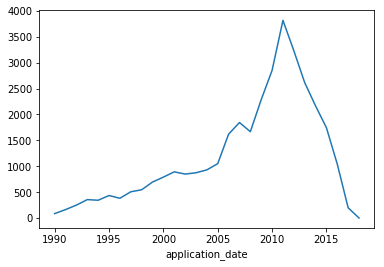

In [77]:
patent.groupby(patent.application_date.dt.year).granted.count().plot()

In [78]:
patent.groupby(patent.application_date.dt.year).granted.count().sort_values()

application_date
2018       1
1990      86
1991     163
2017     198
1992     250
1994     344
1993     356
1996     382
1995     435
1997     507
1998     546
1999     695
2000     790
2002     849
2003     874
2001     892
2004     930
2016    1040
2005    1050
2006    1619
2008    1667
2015    1744
2007    1844
2014    2165
2009    2285
2013    2615
2010    2849
2012    3231
2011    3816
Name: granted, dtype: int64

**The steep drop in patent applications in 2014 is due to the patent ﬁlling process at the USPTO, which involves a signiﬁcant time lag between the ﬁling and disclosure or registration of applications, ranging from several months to over two years.**

So work uptill fig 3 is done

# 3.2) Top assignees of the vehicle related patents.


In [79]:
patent['current_applt'].value_counts().head()

Toyota Jidosha Kabushiki Kaisha    1802
Hyundai Motor Company              1663
TOYOTA MOTOR CORP                  1543
HONDA MOTOR CO LTD                 1016
Ford Global Technologies, LLC       745
Name: current_applt, dtype: int64

In [80]:
assigne_data=patent['current_applt'].value_counts()

In [81]:
df_assigne= pd.DataFrame(data=assigne_data)

In [82]:
df_assigne.head()

,current_applt
Toyota Jidosha Kabushiki Kaisha,1802
Hyundai Motor Company,1663
TOYOTA MOTOR CORP,1543
HONDA MOTOR CO LTD,1016
"Ford Global Technologies, LLC",745


In [83]:
df_assigne['Commulative']=patent['current_applt'].value_counts(normalize=True)

In [84]:
df_assigne.head()

,current_applt,Commulative
Toyota Jidosha Kabushiki Kaisha,1802,0.052936
Hyundai Motor Company,1663,0.048853
TOYOTA MOTOR CORP,1543,0.045328
HONDA MOTOR CO LTD,1016,0.029846
"Ford Global Technologies, LLC",745,0.021885


In [85]:
df_assigne=df_assigne.rename(index=str, columns={" ": "Assigne", "current_applt": "# of patents"})

In [86]:
df_assigne.head(15)

,# of patents,Commulative
Toyota Jidosha Kabushiki Kaisha,1802,0.052936
Hyundai Motor Company,1663,0.048853
TOYOTA MOTOR CORP,1543,0.045328
HONDA MOTOR CO LTD,1016,0.029846
"Ford Global Technologies, LLC",745,0.021885
NISSAN MOTOR CO LTD,693,0.020358
"Honda Motor Co., Ltd.",517,0.015188
"Nissan Motor Co., Ltd.",480,0.014101
Honda Giken Kogyo Kabushiki Kaisha,340,0.009988
TOYOTA JIDOSHA KABUSHIKI KAISHA,307,0.009019


**Problem of duplicate assignee**

# 4 Text Mining

## 4.1 )-Checking data for text analysis

In [97]:
patent_abst=patent['appln_abstr']

In [98]:
chars = list(set(patent_abst)) 
data_size, vocab_size = len(patent_abst), len(chars)
print ("Patent data has chars", data_size)
print ("Patent data has unique chars", vocab_size)

Patent data has chars 34223
Patent data has unique chars 28990


**still there are alot of unique letters. Seems like patents do use key words alot**

In [99]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import nltk
import gensim

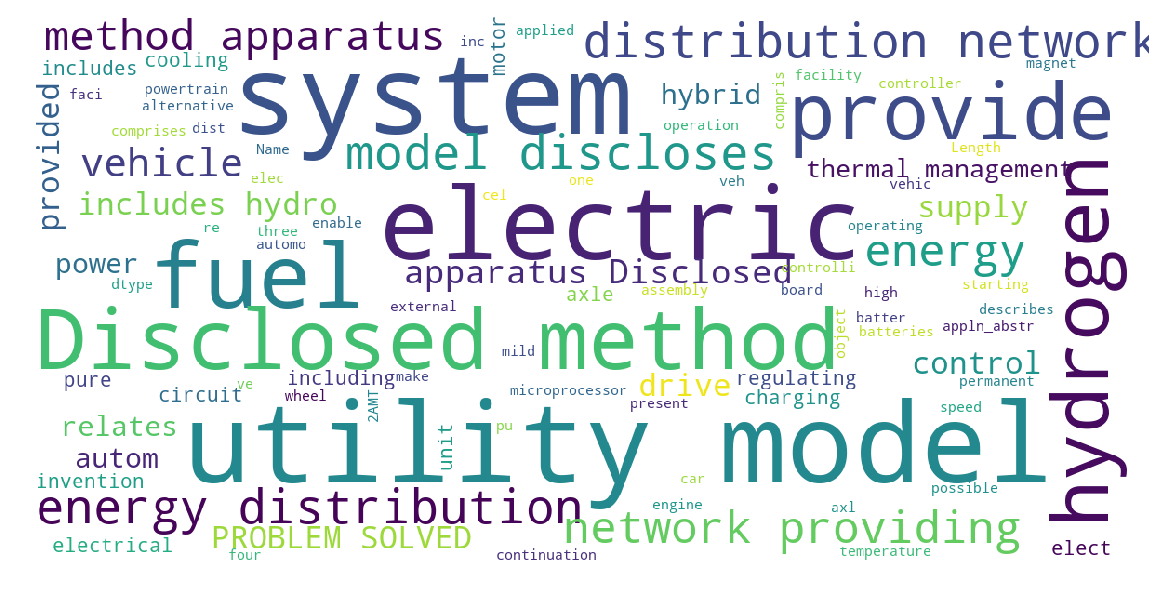

In [104]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(patent['appln_abstr'].dropna())